In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip install h2o
import os

In [ ]:
import re

In [ ]:
import matplotlib.pyplot as plt
def save_classification_metrics_and_plots(model, data, save_path):
    """
    Save important classification metrics and plots to a file.

    Args:
        model (H2OModel): The classification model.
        data (H2OFrame): The dataset for evaluation.
        save_path (str): The directory path where metrics and plots will be saved.

    Returns:
        None
    """
    # Create a directory to save the files
    os.makedirs(save_path, exist_ok=True)

    # Compute confusion matrix using the perf object
    perf = model.model_performance(data)
    confusion = perf.confusion_matrix()

    with open(os.path.join(save_path, 'confusion_matrix.txt'), 'w') as confusion_file:
      confusion_file.write(str(confusion))

    # Save the confusion matrix as a CSV file
    #confusion.to_csv(os.path.join(save_path, 'confusion_matrix.csv'))

    # Save classification metrics to a text file
    with open(os.path.join(save_path, 'classification_metrics.txt'), 'w') as metrics_file:
        metrics_file.write(f"Accuracy: {perf.accuracy()}\n")
        metrics_file.write(f"Precision: {perf.precision()}\n")
        metrics_file.write(f"Recall: {perf.recall()}\n")
        metrics_file.write(f"F1 Score: {perf.F1()}\n")

    roc_curve_file = f"{save_path}/roc_curve.png"

    # Use the plot function with save_to_file parameter to save the plots to files
    perf.plot(type="roc", save_to_file=roc_curve_file)

    # Save AUC to a text file
    auc = perf.auc()
    with open(os.path.join(save_path, 'auc.txt'), 'w') as auc_file:
        auc_file.write(f"AUC: {auc}\n")



In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
h2o.init(max_mem_size = "45g")


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 hours 19 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,1 month and 12 days
H2O_cluster_name:,H2O_from_python_unknownUser_3xmnx0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,43.89 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [ ]:
column_types = {'billable_ipc': 'enum'}


In [ ]:
cases2010to2018_h2o = h2o.import_file('/content/drive/MyDrive/Law/automl_2010to2018_merged_criminal_final.csv', col_types=column_types)
#cases2010to2018_h2o = h2o.import_file('/content/drive/MyDrive/Law/automl_2010to2018_merged_all.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
data_pandas = cases2010to2018_h2o.as_data_frame()

# Replace 'your_enum_column' with the name of the enum column you want to inspect
unique_values = data_pandas['billable_ipc'].unique()

# Display the unique values
print("Unique values in the enum column:")
for value in unique_values:
    print(value)

Unique values in the enum column:
nan
non-bailable
not applicable to section
unclear, need to check
bailable
depends


In [ ]:
cases2010to2018_h2o.types

{'year': 'int',
 'state_code': 'int',
 'female_defendant': 'int',
 'female_petitioner': 'enum',
 'female_adv_def': 'int',
 'female_adv_pet': 'int',
 'billable_ipc': 'enum',
 'female_judge_filing': 'enum',
 'female_judge_decision': 'enum',
 'judgediff': 'int',
 'pendency_first_filing': 'int',
 'muslim_defendant': 'enum',
 'muslim_petitioner': 'enum',
 'muslim_adv_def': 'int',
 'muslim_adv_pet': 'int',
 'court_details': 'enum',
 'state_district': 'enum',
 'pendency_model_multiyear': 'enum',
 'filing_judge_tenure_at_filing': 'int',
 'decision_judge_tenure_at_decision': 'int',
 'act_s': 'enum',
 'section_s': 'int',
 'type_name_s': 'enum',
 'judge_position_s': 'enum',
 'number_sections_ipc_category': 'enum'}

In [ ]:
cases2010to2018_h2o

year,state_code,female_defendant,female_petitioner,female_adv_def,female_adv_pet,billable_ipc,female_judge_filing,female_judge_decision,judgediff,pendency_first_filing,muslim_defendant,muslim_petitioner,muslim_adv_def,muslim_adv_pet,court_details,state_district,pendency_model_multiyear,filing_judge_tenure_at_filing,decision_judge_tenure_at_decision,act_s,section_s,type_name_s,judge_position_s,number_sections_ipc_category
2014,1,0,0 male,0,0,NA,0 nonfemale,1 female,1,0,0 nonmuslim,0 nonmuslim,0,0,1_2_1,1_2,delayed,120,nan,Code of Criminal Procedure,0,NA,District And Sessions Court,NA
2015,1,0,0 male,0,0,NA,0 nonfemale,0 nonfemale,1,0,1 muslim,0 nonmuslim,0,0,1_2_1,1_2,delayed,22,nan,Code of Criminal Procedure,0,NA,District And Sessions Court,NA
2014,1,0,1 female,0,0,NA,1 female,1 female,0,0,0 nonmuslim,0 nonmuslim,0,0,1_2_1,1_2,ontime,3,13,Code of Criminal Procedure,0,NA,District And Sessions Court,NA
2014,1,0,0 male,0,0,NA,0 nonfemale,0 nonfemale,0,0,0 nonmuslim,0 nonmuslim,1,0,1_2_1,1_2,ontime,13,20,Code of Criminal Procedure,0,NA,District And Sessions Court,NA
2014,1,0,0 male,0,0,NA,0 nonfemale,0 nonfemale,1,0,0 nonmuslim,0 nonmuslim,0,0,1_2_1,1_2,delayed,18,nan,Code of Criminal Procedure,0,NA,District And Sessions Court,NA
2014,1,1,0 male,0,0,NA,0 nonfemale,0 nonfemale,1,0,0 nonmuslim,0 nonmuslim,0,1,1_3_11,1_3,delayed,55,8,Code of Criminal Procedure,0,NA,Criminal Cases Others,NA
2018,1,0,0 male,0,0,NA,0 nonfemale,0 nonfemale,0,0,0 nonmuslim,0 nonmuslim,0,0,1_4_7,1_4,delayed,0,nan,Code of Criminal Procedure,0,cri.m.a.,civil judge,NA
2015,1,0,0 male,0,0,NA,0 nonfemale,0 nonfemale,0,0,1 muslim,0 nonmuslim,0,0,1_10_1,1_10,ontime,2,17,Code of Criminal Procedure,0,NA,District And Sessions Court,NA
2013,1,1,0 male,0,0,NA,0 nonfemale,0 nonfemale,0,2,0 nonmuslim,0 nonmuslim,1,0,1_10_1,1_10,delayed,35,62,Code of Criminal Procedure,0,NA,District And Sessions Court,NA
2015,1,0,1 female,0,0,NA,1 female,1 female,1,0,0 nonmuslim,0 nonmuslim,1,0,1_20_1,1_20,ontime,0,1,Code of Criminal Procedure,0,NA,District And Sessions Court,NA


In [ ]:
#TBD to be converted to embeddings
cases2010to2018_h2o['section_s'] = cases2010to2018_h2o['section_s'].asfactor()
#cases2010to2018_h2o['section_str'] = cases2010to2018_h2o['section_str'].ascharacter()

In [ ]:
# Change types
cases2010to2018_h2o['state_code'] = cases2010to2018_h2o['state_code'].asfactor()
cases2010to2018_h2o['female_defendant'] = cases2010to2018_h2o['female_defendant'].asfactor()
cases2010to2018_h2o['female_adv_def'] = cases2010to2018_h2o['female_adv_def'].asfactor()
cases2010to2018_h2o['female_adv_pet'] = cases2010to2018_h2o['female_adv_pet'].asfactor()
cases2010to2018_h2o['judgediff'] = cases2010to2018_h2o['judgediff'].asfactor()
cases2010to2018_h2o['muslim_adv_def'] = cases2010to2018_h2o['muslim_adv_def'].asfactor()
cases2010to2018_h2o['muslim_adv_pet'] = cases2010to2018_h2o['muslim_adv_pet'].asfactor()


In [ ]:
#Drop unused columns

#cases2010to2018_h2o = cases2010to2018_h2o.drop(['filing_judge_tenure_category', 'decision_judge_tenure_category'], axis=1)


In [ ]:
#change name of billable to bailable_IPC
new_column_name = "bailable ipc"
old_column_name = "billable_ipc"

# Get the current column names as a list
column_names = cases2010to2018_h2o.columns

# Find the index of the column you want to rename
column_index = column_names.index(old_column_name)

# Replace the old column name with the new one
column_names[column_index] = new_column_name

# Set the new column names for the DataFrame
cases2010to2018_h2o.set_names(column_names)

year,state_code,female_defendant,female_petitioner,female_adv_def,female_adv_pet,bailable ipc,female_judge_filing,female_judge_decision,judgediff,pendency_first_filing,muslim_defendant,muslim_petitioner,muslim_adv_def,muslim_adv_pet,court_details,state_district,pendency_model_multiyear,filing_judge_tenure_at_filing,decision_judge_tenure_at_decision,act_s,section_s,type_name_s,judge_position_s,number_sections_ipc_category
2014,1,0,0 male,0,0,NA,0 nonfemale,1 female,1,0,0 nonmuslim,0 nonmuslim,0,0,1_2_1,1_2,delayed,120,nan,Code of Criminal Procedure,0,NA,District And Sessions Court,NA
2015,1,0,0 male,0,0,NA,0 nonfemale,0 nonfemale,1,0,1 muslim,0 nonmuslim,0,0,1_2_1,1_2,delayed,22,nan,Code of Criminal Procedure,0,NA,District And Sessions Court,NA
2014,1,0,1 female,0,0,NA,1 female,1 female,0,0,0 nonmuslim,0 nonmuslim,0,0,1_2_1,1_2,ontime,3,13,Code of Criminal Procedure,0,NA,District And Sessions Court,NA
2014,1,0,0 male,0,0,NA,0 nonfemale,0 nonfemale,0,0,0 nonmuslim,0 nonmuslim,1,0,1_2_1,1_2,ontime,13,20,Code of Criminal Procedure,0,NA,District And Sessions Court,NA
2014,1,0,0 male,0,0,NA,0 nonfemale,0 nonfemale,1,0,0 nonmuslim,0 nonmuslim,0,0,1_2_1,1_2,delayed,18,nan,Code of Criminal Procedure,0,NA,District And Sessions Court,NA
2014,1,1,0 male,0,0,NA,0 nonfemale,0 nonfemale,1,0,0 nonmuslim,0 nonmuslim,0,1,1_3_11,1_3,delayed,55,8,Code of Criminal Procedure,0,NA,Criminal Cases Others,NA
2018,1,0,0 male,0,0,NA,0 nonfemale,0 nonfemale,0,0,0 nonmuslim,0 nonmuslim,0,0,1_4_7,1_4,delayed,0,nan,Code of Criminal Procedure,0,cri.m.a.,civil judge,NA
2015,1,0,0 male,0,0,NA,0 nonfemale,0 nonfemale,0,0,1 muslim,0 nonmuslim,0,0,1_10_1,1_10,ontime,2,17,Code of Criminal Procedure,0,NA,District And Sessions Court,NA
2013,1,1,0 male,0,0,NA,0 nonfemale,0 nonfemale,0,2,0 nonmuslim,0 nonmuslim,1,0,1_10_1,1_10,delayed,35,62,Code of Criminal Procedure,0,NA,District And Sessions Court,NA
2015,1,0,1 female,0,0,NA,1 female,1 female,1,0,0 nonmuslim,0 nonmuslim,1,0,1_20_1,1_20,ontime,0,1,Code of Criminal Procedure,0,NA,District And Sessions Court,NA


In [ ]:
cases2010to2018_h2o.types

{'year': 'int',
 'state_code': 'enum',
 'female_defendant': 'enum',
 'female_petitioner': 'enum',
 'female_adv_def': 'enum',
 'female_adv_pet': 'enum',
 'bailable_ipc': 'enum',
 'female_judge_filing': 'enum',
 'female_judge_decision': 'enum',
 'judgediff': 'enum',
 'pendency_first_filing': 'int',
 'muslim_defendant': 'enum',
 'muslim_petitioner': 'enum',
 'muslim_adv_def': 'enum',
 'muslim_adv_pet': 'enum',
 'court_details': 'enum',
 'state_district': 'enum',
 'pendency_model_multiyear': 'enum',
 'filing_judge_tenure_at_filing': 'int',
 'decision_judge_tenure_at_decision': 'int',
 'act_s': 'enum',
 'section_s': 'enum',
 'type_name_s': 'enum',
 'judge_position_s': 'enum',
 'number_sections_ipc_category': 'enum'}

In [ ]:
def tokenize(sentences):
    tokenized = sentences.tokenize(",")
    tokenized_lower = tokenized.tolower()
    return tokenized_lower

In [ ]:
#section_str = tokenize(cases2010to2018_h2o["section_s"])

In [ ]:
#from h2o.estimators.word2vec import H2OWord2vecEstimator

#w2v_model = H2OWord2vecEstimator(vec_size = 20, model_id = "w2v.hex")
#w2v_model.train(training_frame=section_str)

In [ ]:
#section_vecs = w2v_model.transform(section_str, aggregate_method = "AVERAGE")
#print(section_vecs.shape)
#section_vecs

In [ ]:
# Sanity check - find synonyms for the word 'cozy'
#w2v_model.find_synonyms("rule10(1)a", count = 10)

In [ ]:
#valid_section = ~ section_vecs["C1"].isna()

In [ ]:
#cases2010to2018_h2o_final = cases2010to2018_h2o[valid_section,:].cbind(section_vecs[valid_section,:])

In [ ]:
#cases2010to2018_h2o_final.head()

In [ ]:
cases2010to2018_train, cases2010to2018_test, cases2010to2018_valid = cases2010to2018_h2o.split_frame(ratios=[.7, .15])

In [ ]:
cases2010to2018_h2o.types

{'year': 'int',
 'state_code': 'enum',
 'female_defendant': 'enum',
 'female_petitioner': 'enum',
 'female_adv_def': 'enum',
 'female_adv_pet': 'enum',
 'bailable_ipc': 'enum',
 'female_judge_filing': 'enum',
 'female_judge_decision': 'enum',
 'judgediff': 'enum',
 'pendency_first_filing': 'int',
 'muslim_defendant': 'enum',
 'muslim_petitioner': 'enum',
 'muslim_adv_def': 'enum',
 'muslim_adv_pet': 'enum',
 'court_details': 'enum',
 'state_district': 'enum',
 'pendency_model_multiyear': 'enum',
 'filing_judge_tenure_at_filing': 'int',
 'decision_judge_tenure_at_decision': 'int',
 'act_s': 'enum',
 'section_s': 'enum',
 'type_name_s': 'enum',
 'judge_position_s': 'enum',
 'number_sections_ipc_category': 'enum'}

In [ ]:
#Remove all columns not available at time of case filing

# List of columns to keep
columns_to_keep = cases2010to2018_h2o.columns

columns_to_keep.remove("female_judge_decision")
columns_to_keep.remove("decision_judge_tenure_at_decision")
columns_to_keep.remove("pendency_first_filing")
columns_to_keep.remove("judgediff")

# Use the assign method to drop columns
cases2010to2018_h2o = cases2010to2018_h2o[columns_to_keep]

In [ ]:
y = "pendency_model_multiyear"
#y = "pendency_decision_filing"
x = cases2010to2018_h2o.columns
x.remove(y)
x.remove("year")

In [ ]:
aml = H2OAutoML(max_models = 15, max_runtime_secs=82800, seed = 50, verbosity="info", nfolds=0)


In [ ]:
aml.train(x = x, y = y, training_frame = cases2010to2018_train, validation_frame=cases2010to2018_valid)

AutoML progress: |
12:57:09.39: Project: AutoML_2_20231220_125709
12:57:09.39: Cross-validation disabled by user: no fold column nor nfolds > 1.
12:57:09.39: Setting stopping tolerance adaptively based on the training frame: 0.004171703272660179
12:57:09.40: Build control seed: 50
12:57:09.40: training frame: Frame key: AutoML_2_20231220_125709_training_py_10_sid_9ee7    cols: 25    rows: 57461  chunks: 32    size: 1615471  checksum: -63090820372320
12:57:09.40: validation frame: Frame key: py_12_sid_9ee7    cols: 25    rows: 12259  chunks: 32    size: 891240  checksum: -15715729141065
12:57:09.40: leaderboard frame: Frame key: py_12_sid_9ee7    cols: 25    rows: 12259  chunks: 32    size: 891240  checksum: -15715729141065
12:57:09.40: blending frame: NULL
12:57:09.40: response column: pendency_model_multiyear
12:57:09.40: fold column: null
12:57:09.40: weights column: null
12:57:09.40: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g,

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_2_20231220_125709


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          7.74223e+06            20           20           20            4109          5103          4579.44

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.13851770283665008
RMSE: 0.37217966472746744
LogLoss: 0.446990182046512
Mean Per-Class Error: 0.24056952341789845
AUC: 0.8757026909219462
AUCPR: 0.9282912389342324
Gini: 0.7514053818438924

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4503118418190743
         delayed    ontime    Error    Rate
-------  ---------  --------  -------  -----------------
delayed  13442      7621      0.3618   (7621.0/21063.0)
ontime   4343       32055     0.1193   (4343.0/36398.0)
Total    17785      39676     0.2082   (11964.0/57461.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.450312     0.842732  231
max f2                       0.173312     0.906521  337
max f0point5                 0.702704     0.856184  128
max accuracy                 0.532777     0.796662  199
max precision                0.999486     0.995717  1
max recall                   1.37557e-05  1         399
max specificity              0.999943     0.998196  0
max absolute_mcc             0.568736     0.566442  183
max min_per_class_accuracy   0.600381     0.789536  171
max mean_per_class_accuracy  0.650591     0.791554  150
max tns                      0.999943     21025     0
max fns                      0.999943     27890     0
max fps                      1.37557e-05  21063     399
max tps                      1.37557e-05  36398     399
max tnr                      0.999943     0.998196  0
max fnr                      0.999943     0.766251  0
max fpr                      1.37557e-05  1         399
max tpr                      1.37557e-05  1         399

Gains/Lift Table: Avg response rate: 63.34 %, avg score: 63.83 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain       cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  ---------  -----------------  --------------------
1        0.101182                    1                  1.56864   1.56864            0.993636         1          0.993636                    1                   0.158718        0.158718                   56.8639    56.8639            0.156961
2        0.150015                    0.999619           1.57812   1.57173            0.999644         0.999847   0.995592                    0.99995             0.0770647       0.235782                   57.8123    57.1726            0.233978
3        0.200014                    0.992301           1.5644    1.56989            0.99095          0.997351   0.994431                    0.9993              0.0782186       0.314001                   56.4399    56.9895            0.310962
4        0.300012                    0.920579           1.48115   1.54032            0.938218         0.960575   0.975695                    0.986393            0.148113        0.462113                   48.1151    54.0315            0.442221
5        0.40001                     0.81197            1.32592   1.48672         

In [ ]:
aml.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DRF_1_AutoML_2_20231220_125709,0.872718,0.424685,0.927728,0.243452,0.375095,0.140696
GBM_1_AutoML_2_20231220_125709,0.86908,0.431325,0.925336,0.240373,0.377879,0.142793
GBM_4_AutoML_2_20231220_125709,0.866868,0.436248,0.923878,0.25074,0.379844,0.144282
XGBoost_grid_1_AutoML_2_20231220_125709_model_1,0.865974,0.432294,0.923499,0.252585,0.379476,0.144002
GBM_3_AutoML_2_20231220_125709,0.863786,0.438575,0.92185,0.259125,0.381337,0.145418
GBM_2_AutoML_2_20231220_125709,0.86277,0.4394,0.921299,0.257759,0.38186,0.145817
GBM_grid_1_AutoML_2_20231220_125709_model_1,0.861908,0.439172,0.920961,0.268136,0.382274,0.146134
GBM_5_AutoML_2_20231220_125709,0.861229,0.440851,0.920447,0.261966,0.382797,0.146533
XGBoost_2_AutoML_2_20231220_125709,0.858161,0.442503,0.918941,0.270599,0.384679,0.147978
XGBoost_3_AutoML_2_20231220_125709,0.855901,0.447936,0.917236,0.296019,0.387041,0.149801


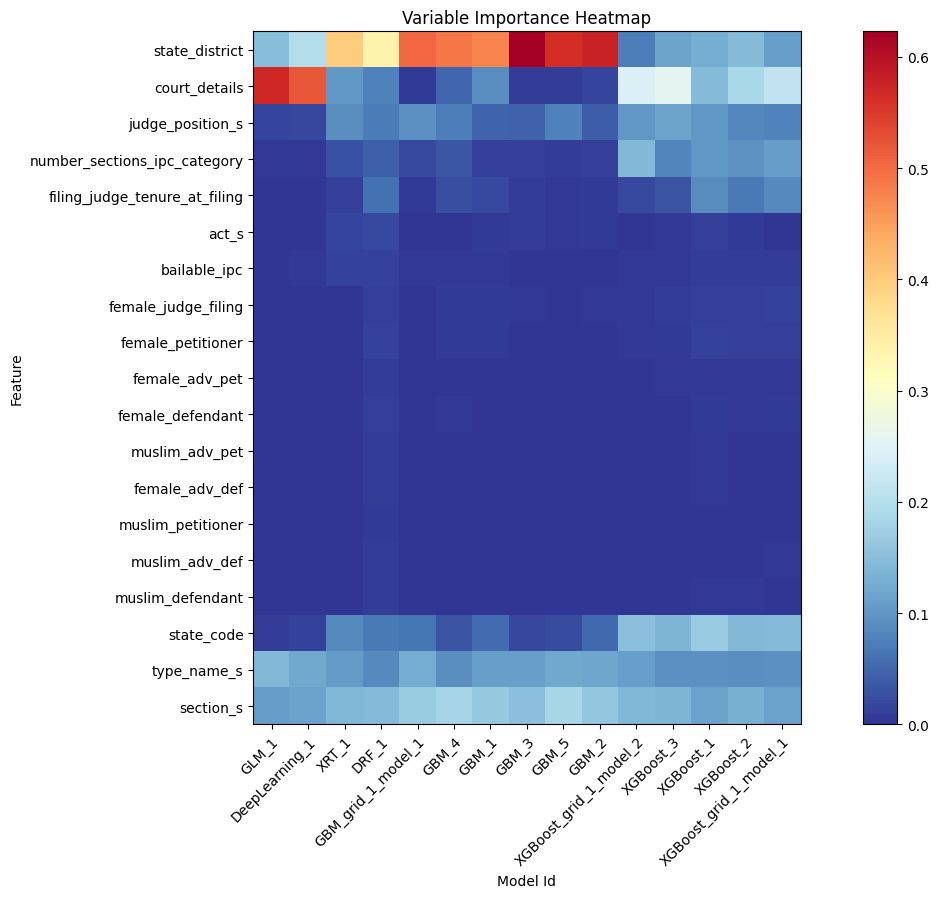

In [ ]:
 heatmap = h2o.varimp_heatmap(aml.leaderboard)


In [ ]:
# Get training timing info
info = aml.training_info
print(info)

{'creation_epoch': '1703077029', 'start_epoch': '1703077029', 'start_XGBoost_def_2': '1703077029', 'start_GLM_def_1': '1703077039', 'start_GBM_def_5': '1703077056', 'start_XGBoost_def_1': '1703077061', 'start_DRF_def_1': '1703077073', 'start_GBM_def_2': '1703077087', 'start_GBM_def_3': '1703077091', 'start_GBM_def_4': '1703077095', 'start_XGBoost_def_3': '1703077100', 'start_DRF_XRT': '1703077113', 'start_GBM_def_1': '1703077122', 'start_DeepLearning_def_1': '1703077125', 'start_XGBoost_grid_1': '1703077136', 'start_GBM_grid_1': '1703077156', 'stop_epoch': '1703077159', 'duration_secs': '129'}


In [ ]:
lb = h2o.automl.get_leaderboard(aml)
lb_df = lb.as_data_frame()

# Now, you can save it to a CSV file
lb_df.to_csv('leaderboard.csv', index=False)

<ipython-input-2-9f0c8797802e>:37: H2ODeprecationWarning: ``save_to_file`` param of ``H2OBinomialModelMetrics.plot`` is deprecated, please use ``save_plot_path`` instead.
  perf.plot(type="roc", save_to_file=roc_curve_file)


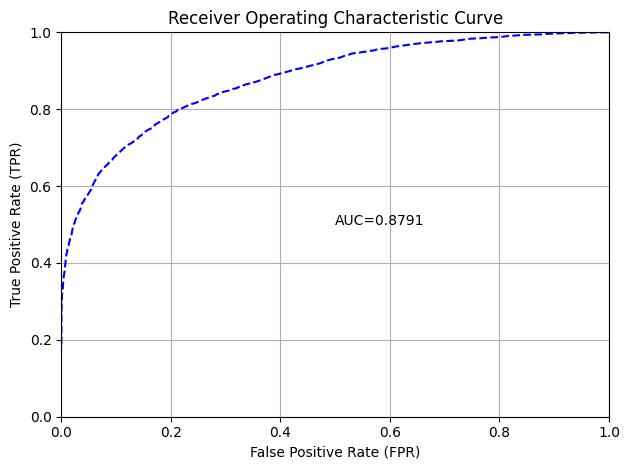

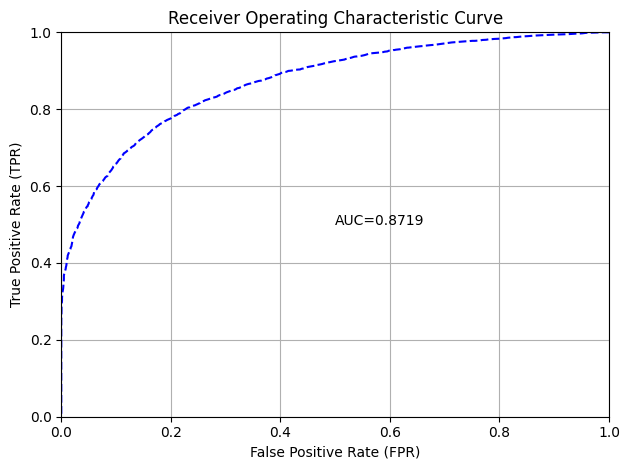

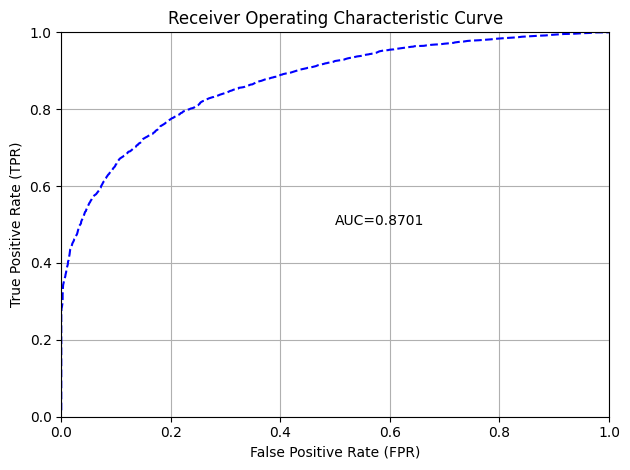

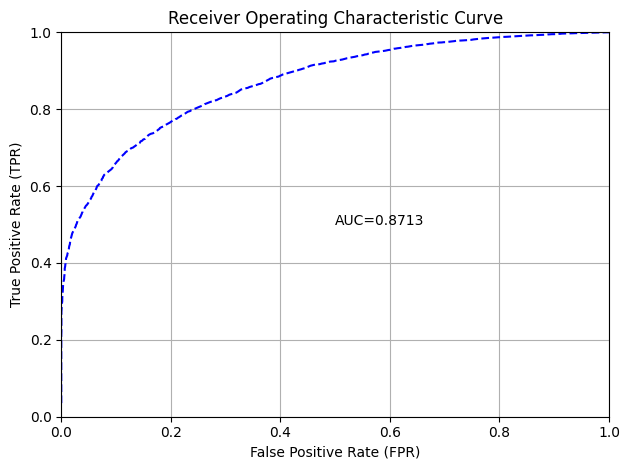

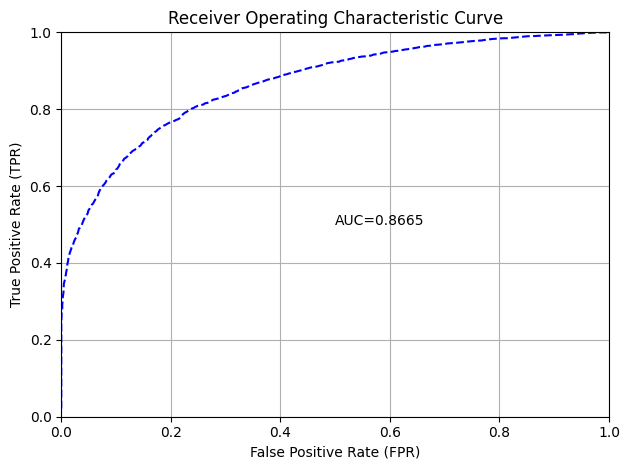

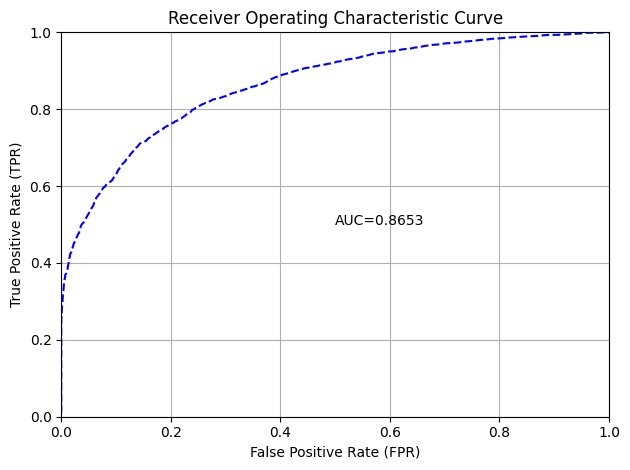

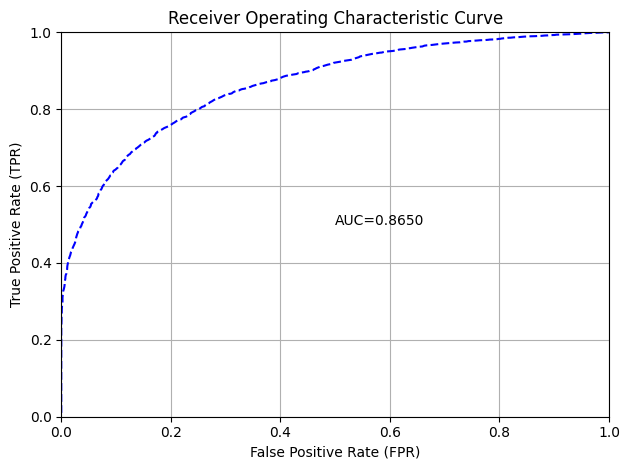

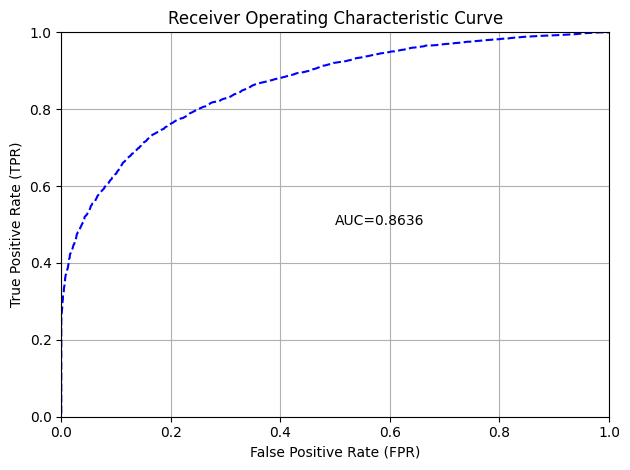

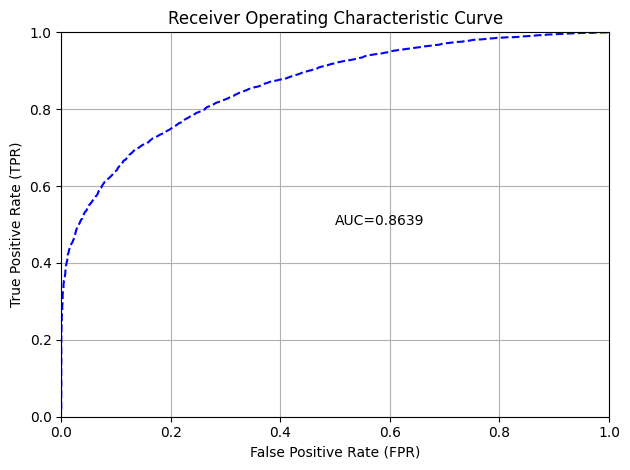

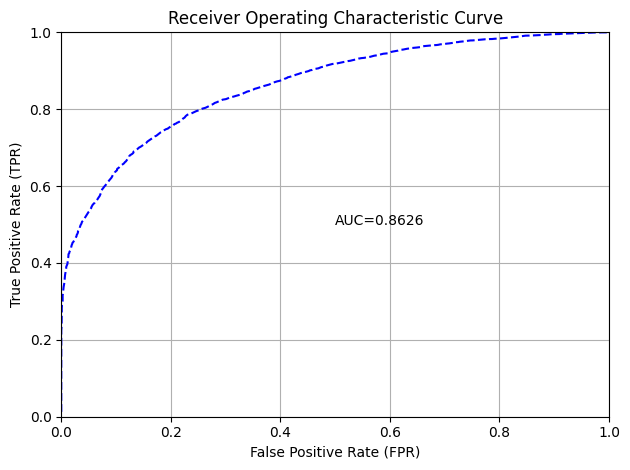

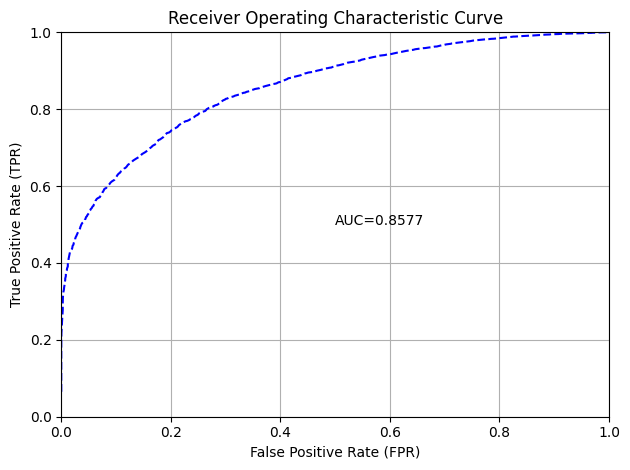

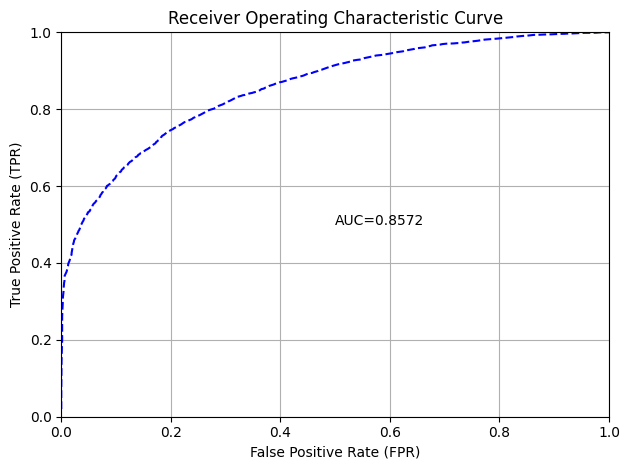

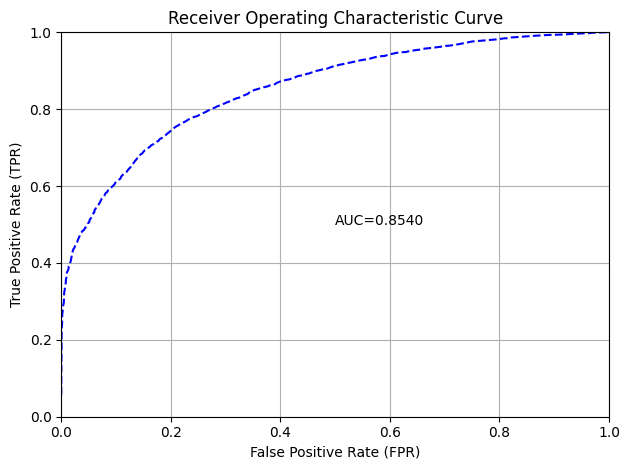

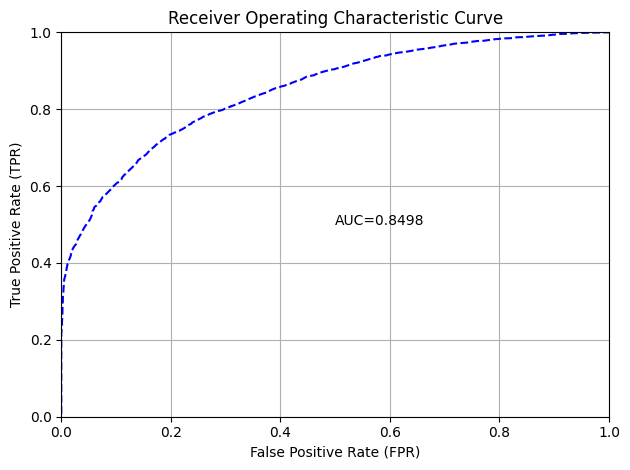

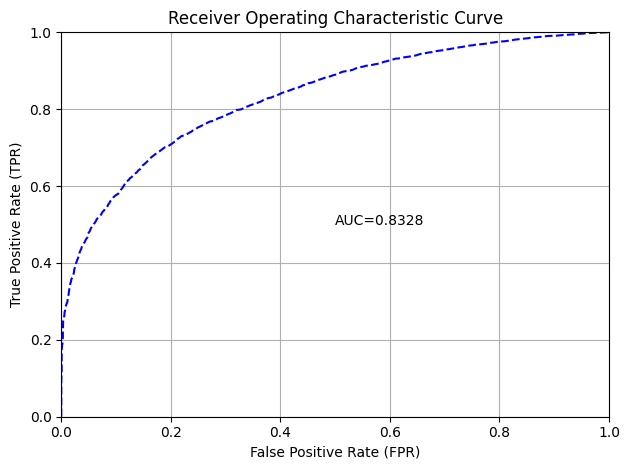

In [ ]:
output_directory = "/content/drive/MyDrive/Law/criminalpartial-used/performance"
os.makedirs(output_directory, exist_ok=True)

save_path = "/content/drive/MyDrive/Law/criminalpartial-used/saved_models/"
os.makedirs(save_path, exist_ok=True)

# Iterate through the models in the leaderboard
for index, row in lb_df.iterrows():
    model_id = row['model_id']
    model = h2o.get_model(model_id)

    # Create a subdirectory for each model
    model_directory = os.path.join(output_directory, model_id)
    os.makedirs(model_directory, exist_ok=True)
    model.save_mojo(path=save_path)
    # Call the function to save metrics and plots for the current model
    save_classification_metrics_and_plots(model,cases2010to2018_test, model_directory)


In [ ]:
!cp /content/leaderboard.csv /content/drive/MyDrive/Law/criminalpartial-used/leaderboard.csv

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
DRF_1_AutoML_2_20231220_125709,0.879097,0.410766,0.933405,0.250295,0.369034,0.136186,14657,0.012157,DRF
GBM_1_AutoML_2_20231220_125709,0.871891,0.425443,0.929216,0.254322,0.374797,0.140472,5563,0.010574,GBM
XGBoost_grid_1_AutoML_2_20231220_125709_model_1,0.871347,0.421916,0.929066,0.27091,0.374739,0.14043,9248,0.003763,XGBoost
GBM_4_AutoML_2_20231220_125709,0.870101,0.429756,0.927817,0.256738,0.376329,0.141623,5380,0.008905,GBM
GBM_3_AutoML_2_20231220_125709,0.866463,0.433628,0.92567,0.256266,0.378518,0.143276,3898,0.008211,GBM
GBM_2_AutoML_2_20231220_125709,0.865331,0.434201,0.924712,0.264775,0.378988,0.143632,3361,0.008192,GBM
GBM_grid_1_AutoML_2_20231220_125709_model_1,0.86499,0.434027,0.92482,0.261763,0.37919,0.143785,2718,0.008397,GBM
XGBoost_2_AutoML_2_20231220_125709,0.863901,0.432363,0.924731,0.282187,0.379842,0.14428,11425,0.003498,XGBoost
GBM_5_AutoML_2_20231220_125709,0.863611,0.436588,0.92403,0.245976,0.380262,0.144599,2894,0.007741,GBM
XGBoost_3_AutoML_2_20231220_125709,0.8626,0.437723,0.923709,0.28659,0.38198,0.145909,12784,0.003509,XGBoost


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DRF_1_AutoML_2_20231220_125709

,delayed,ontime,Error,Rate
delayed,2708.0,1733.0,0.3902,(1733.0/4441.0)
ontime,868.0,6997.0,0.1104,(868.0/7865.0)
Total,3576.0,8730.0,0.2114,(2601.0/12306.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

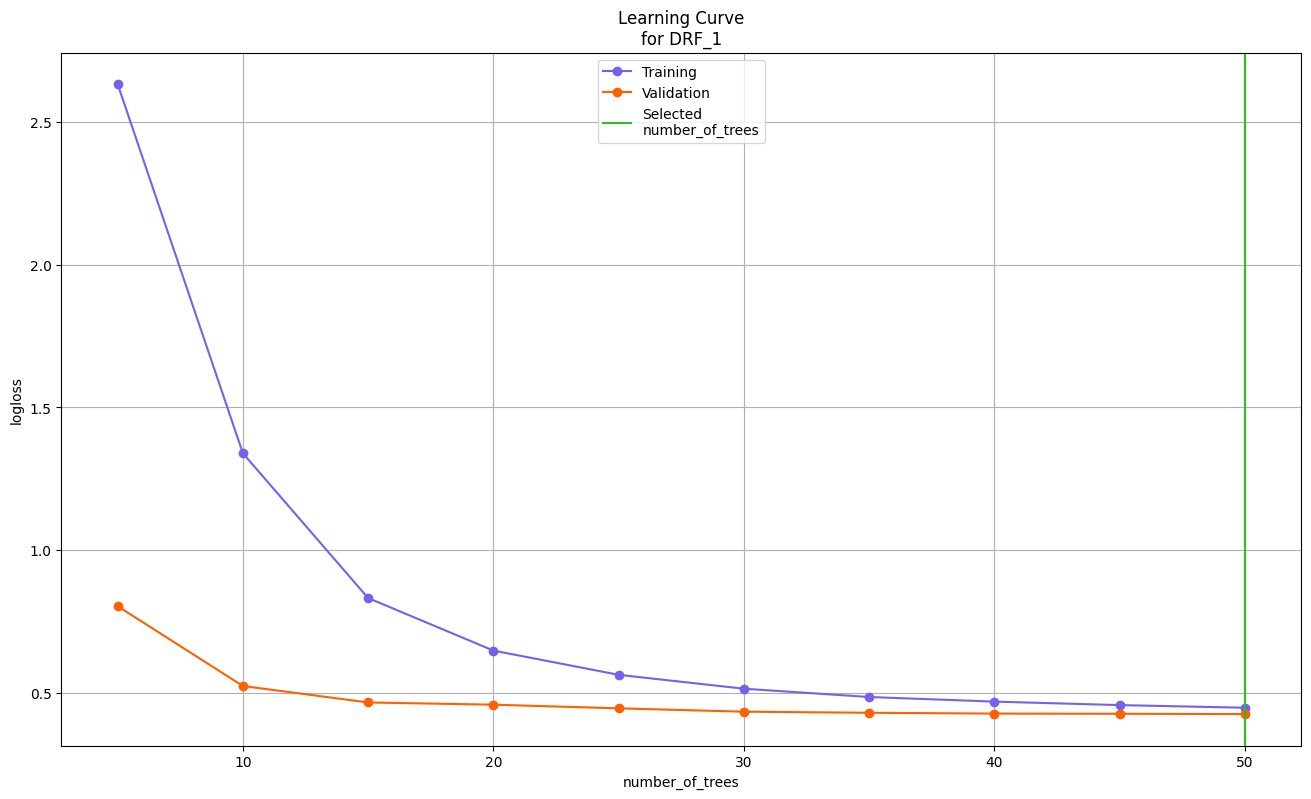

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

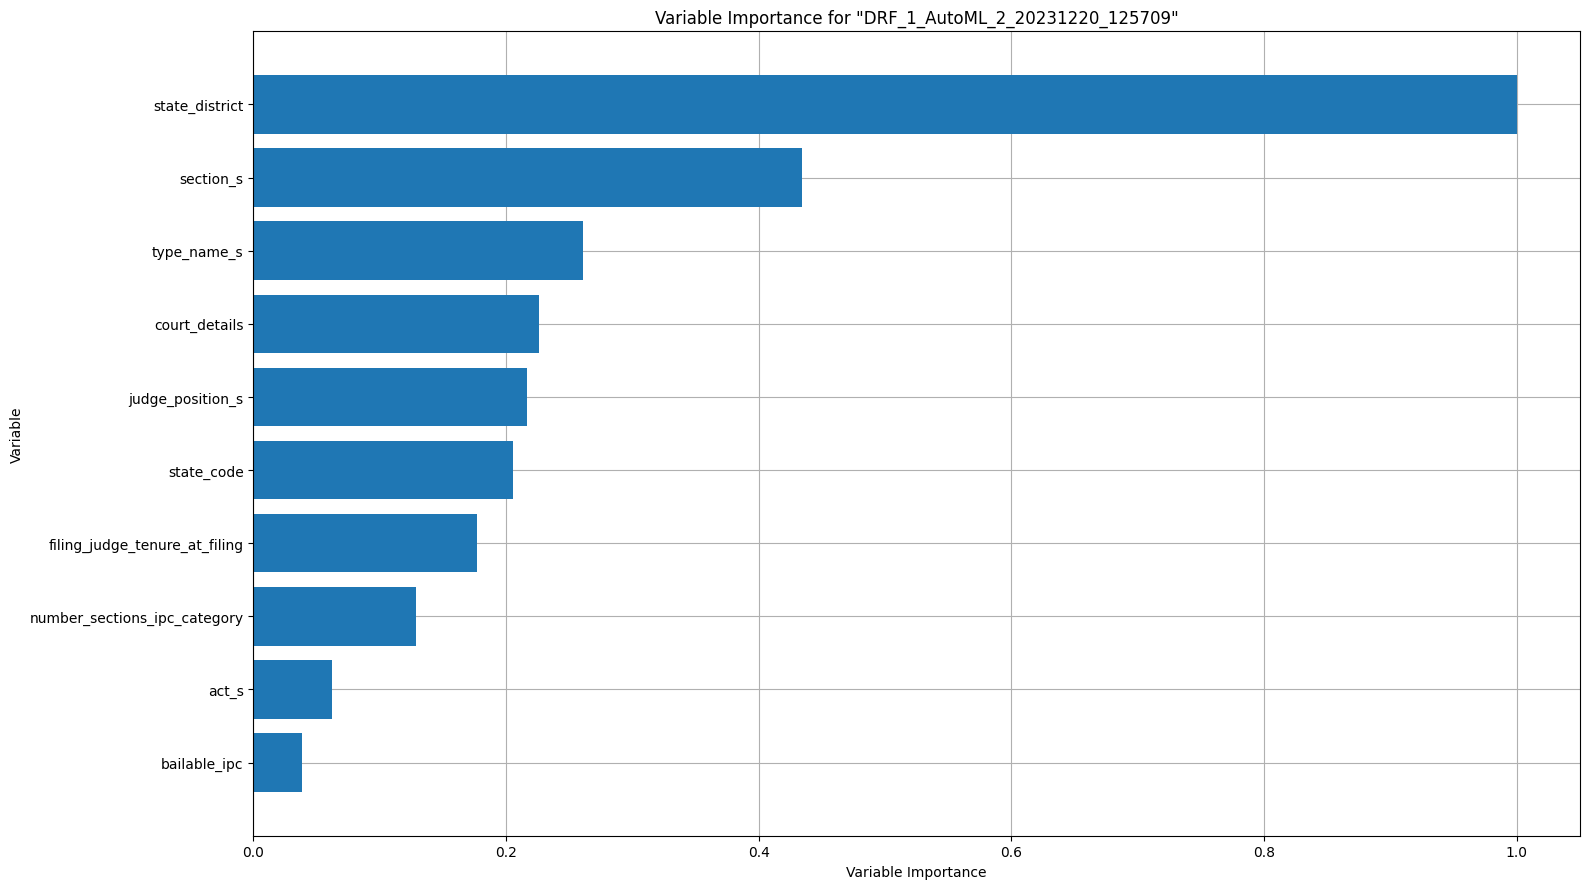

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

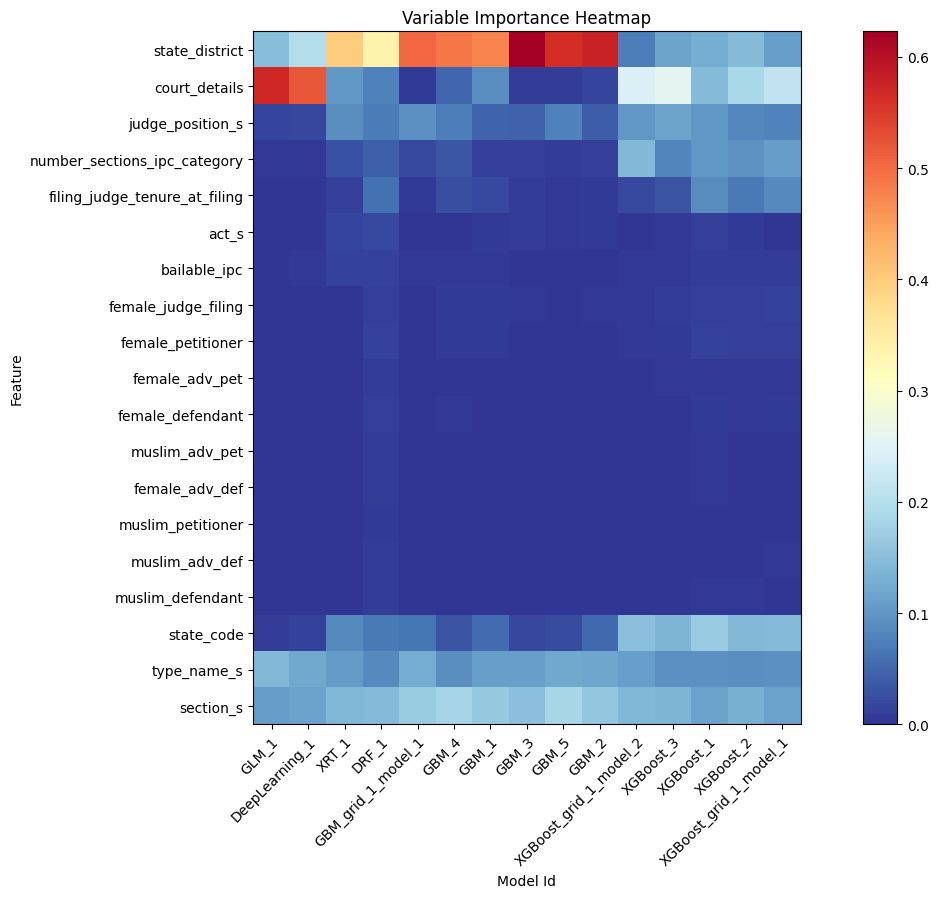

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

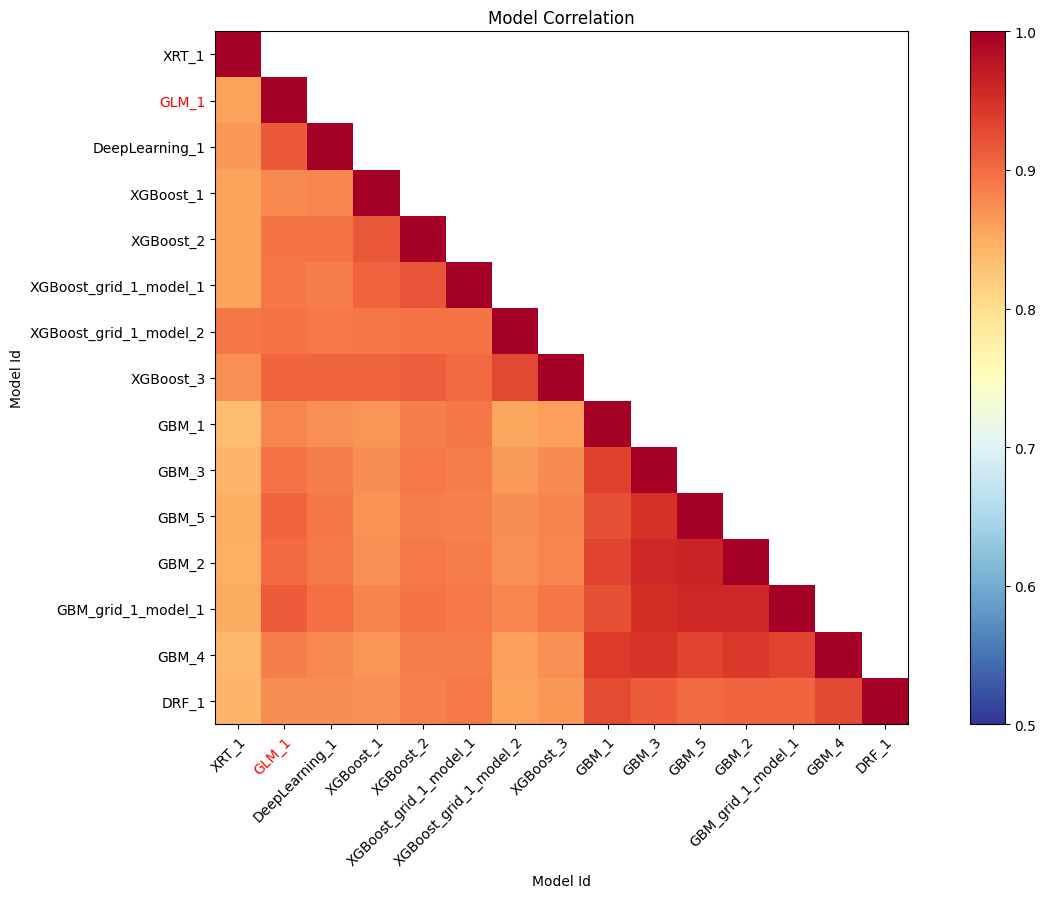

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

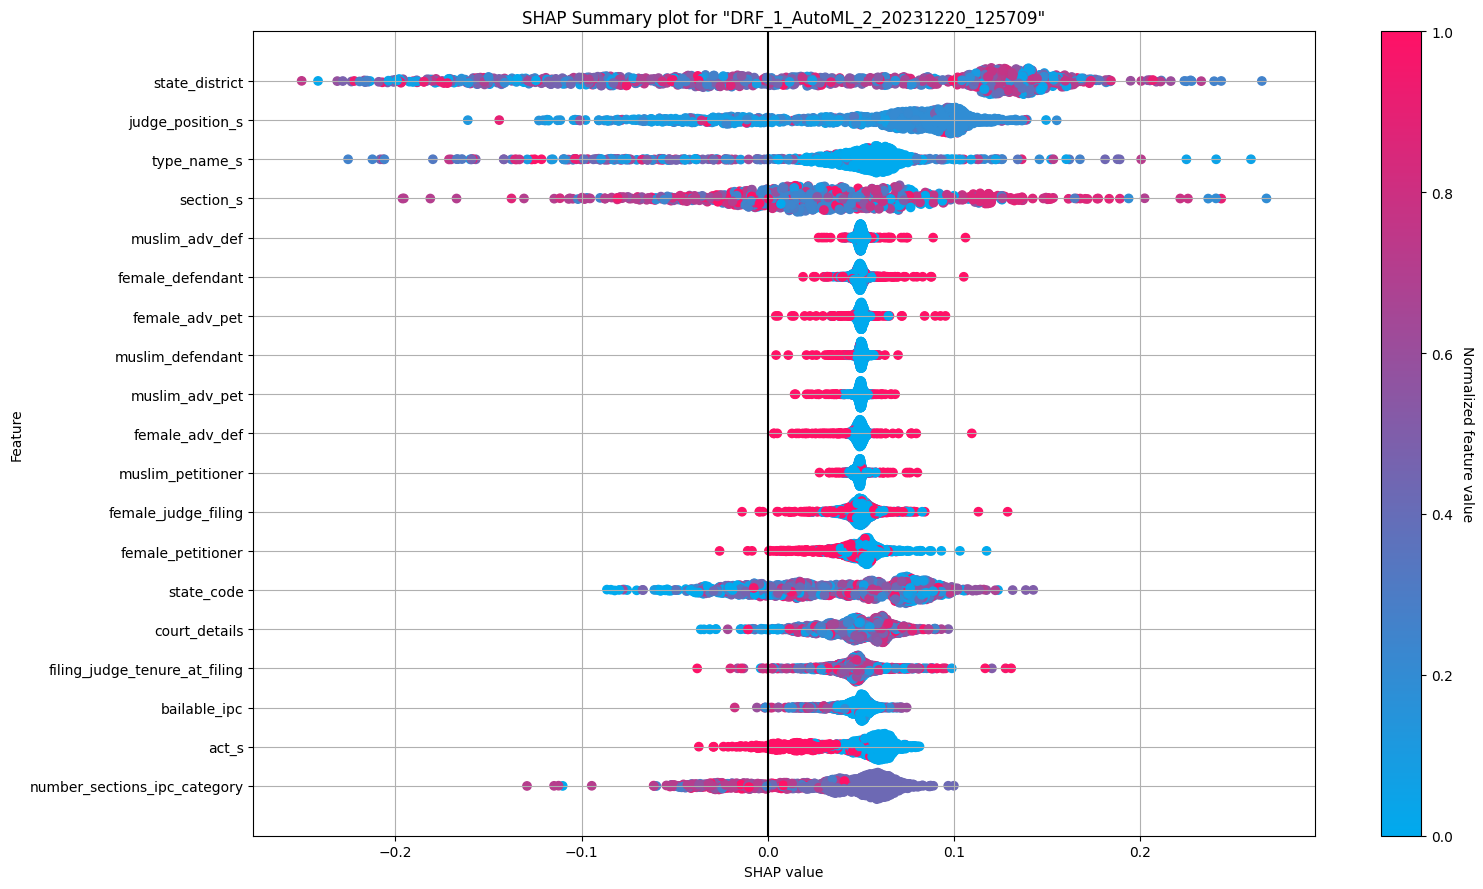

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

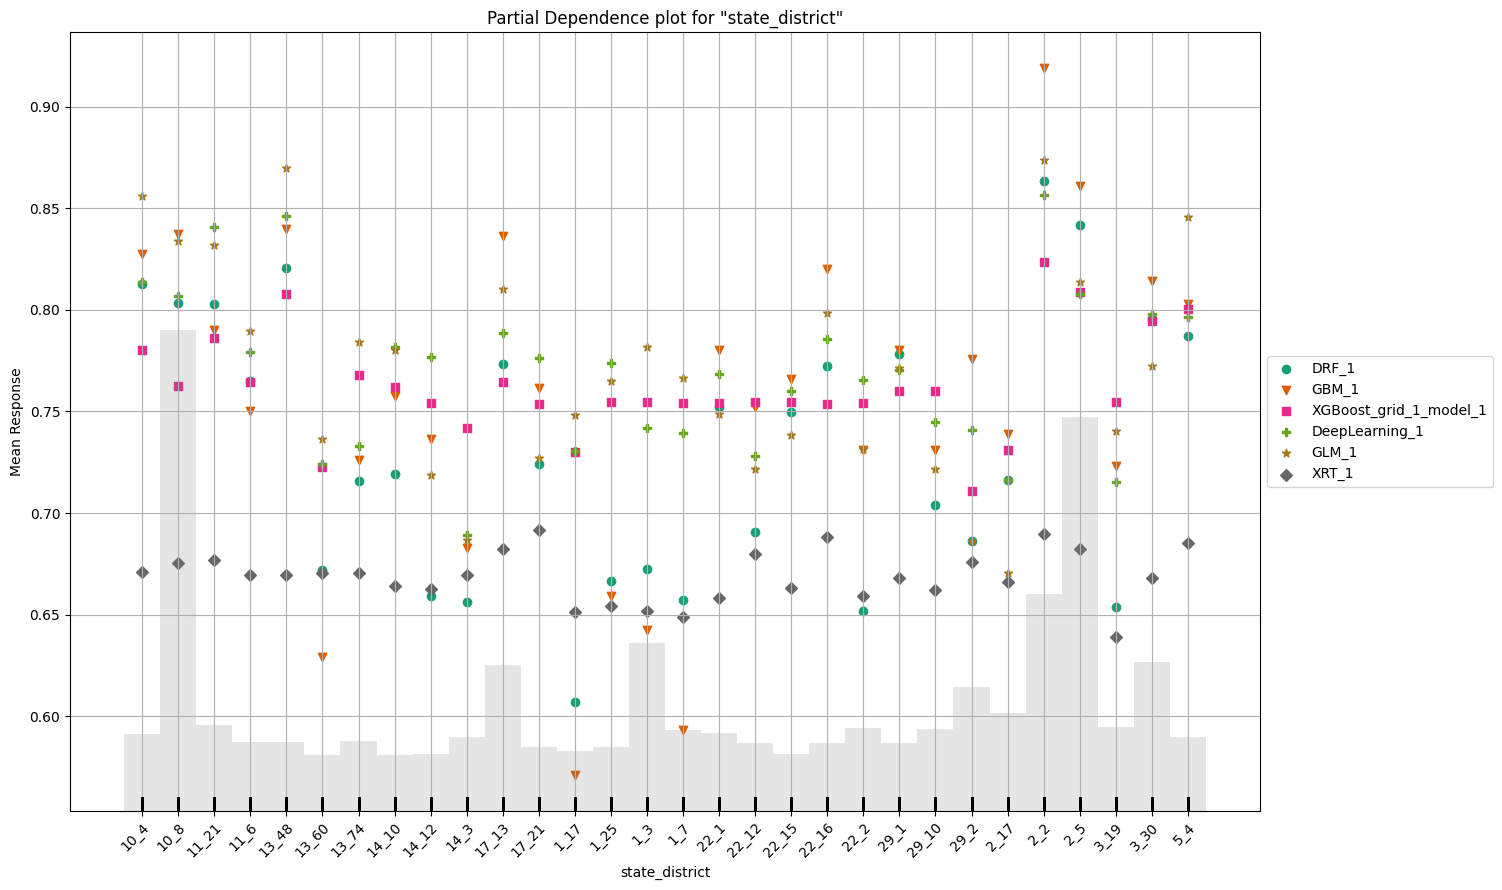

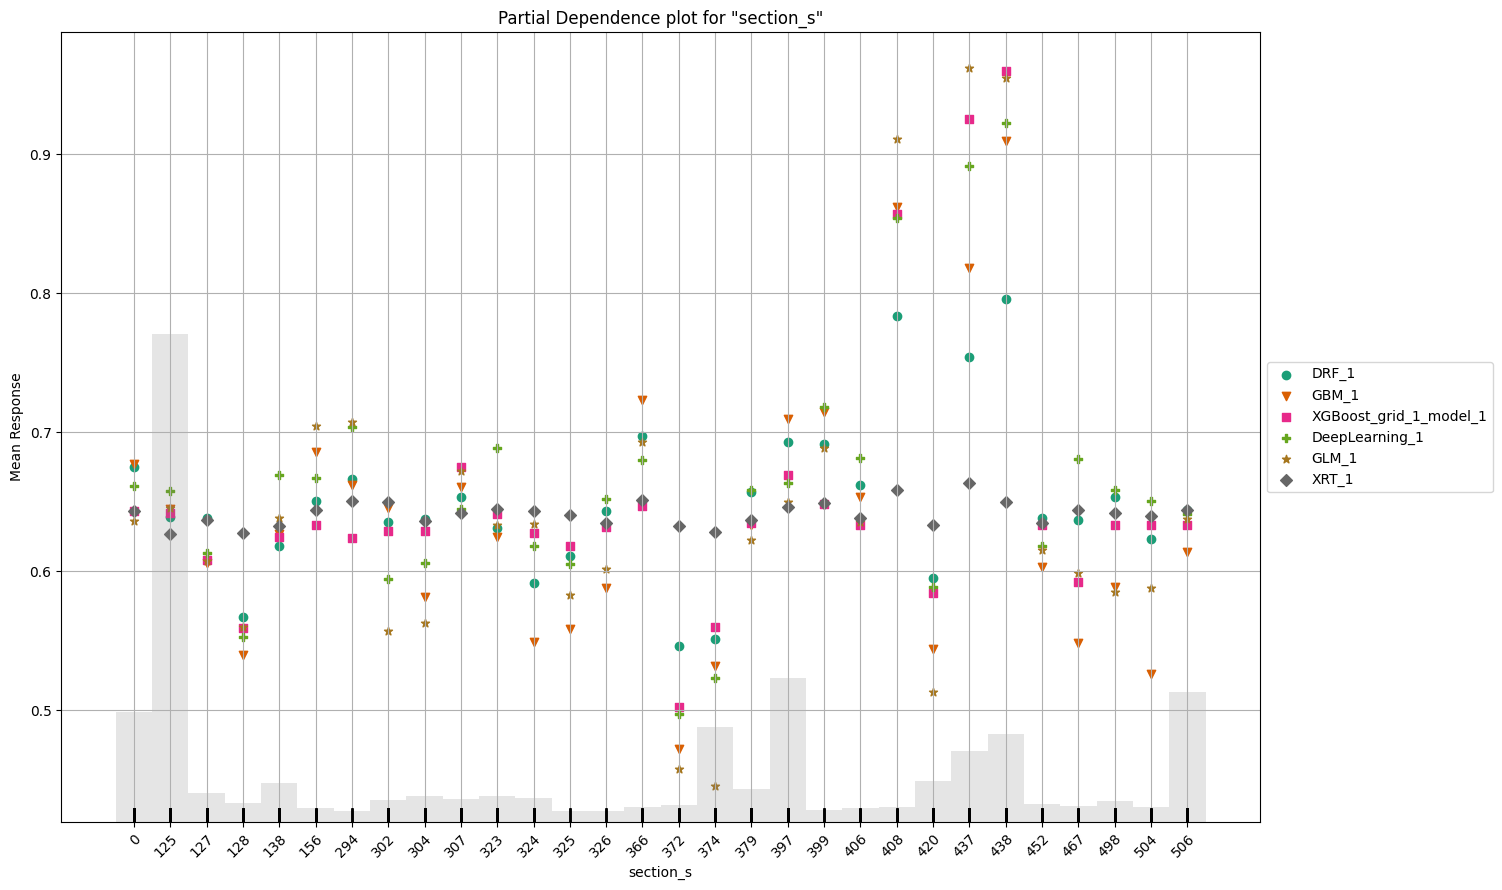

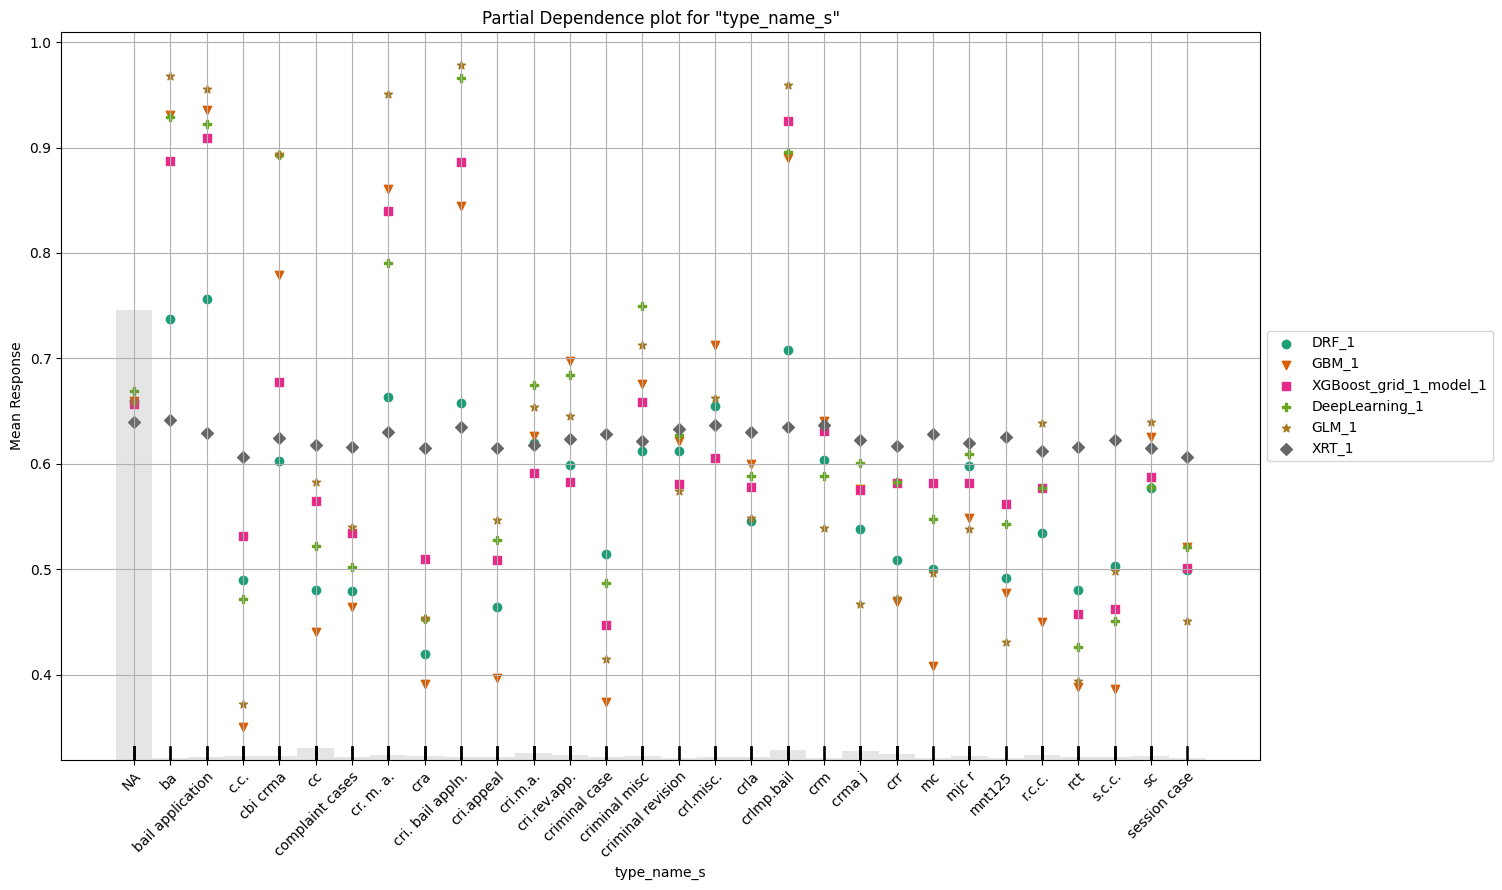

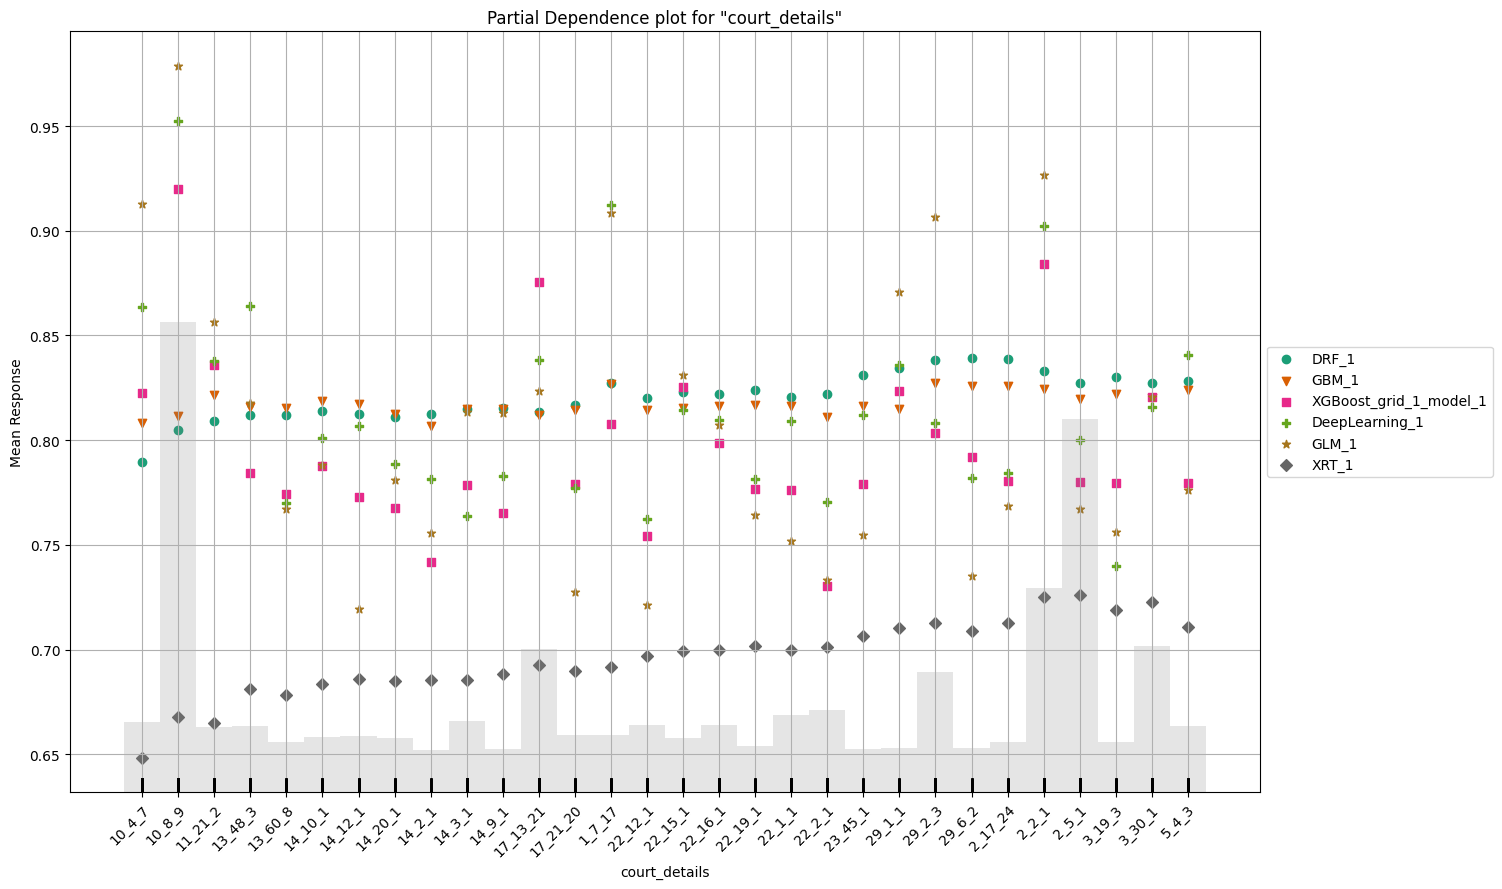

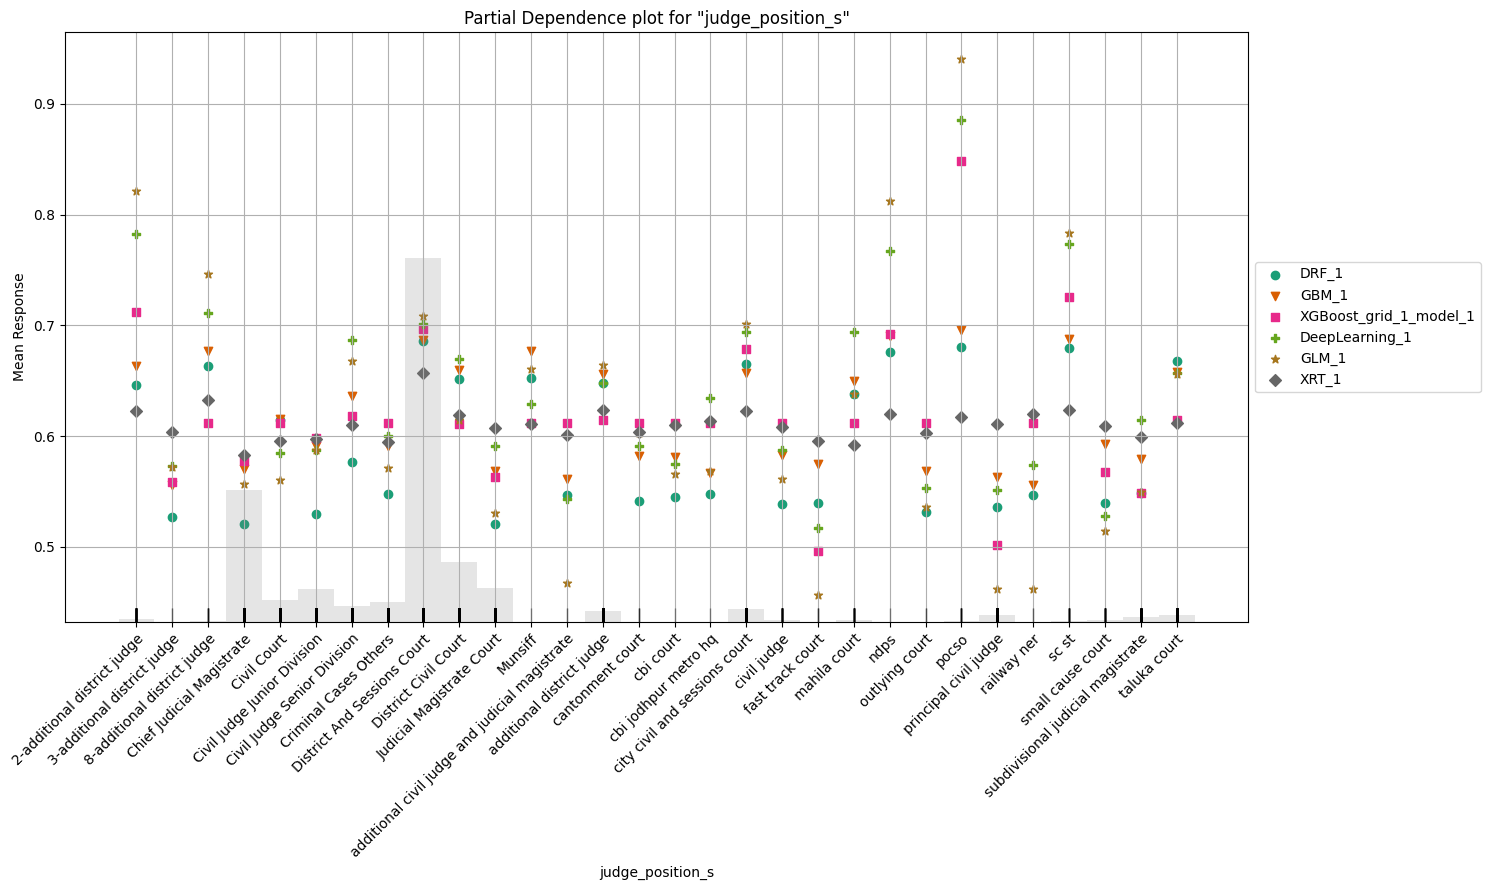

In [ ]:
explanations = aml.explain(cases2010to2018_test)

def save_plots(plot_data, parent_key=""):
    for key, value in plot_data.items():
        if isinstance(value, h2o.plot._plot_result._MObject):
            # This is a plot object, save it
            plot_figure = value.figure()
            plot_filename = f"{plots_dir}/{parent_key}_{key}.png"
            plot_figure.savefig(plot_filename)
        elif isinstance(value, dict):
            # Recursively explore nested dictionaries
            save_plots(value, parent_key=f"{parent_key}_{key}")

# Create a directory to save the plots
plots_dir = "/content/drive/MyDrive/Law/criminalpartial-used/explanation_plots"
os.makedirs(plots_dir, exist_ok=True)

# Call the function to save plots
save_plots(explanations)

In [ ]:
best_model = h2o.get_model(lb_df.iloc[0, 0])

In [ ]:
# View the parameters for the XGBoost model selected above
best_model.params.keys()

print(best_model.params.keys())

# Inspect individual parameter values
print(best_model.params['ntrees'])
print(best_model.params['max_depth'])
print(best_model.params['min_rows'])
print(best_model.params['score_tree_interval'])
print(best_model.params['stopping_rounds'])
print(best_model.params['col_sample_rate_per_tree'])
print(best_model.params['min_split_improvement'])
print(best_model.params['sample_rate'])
print(best_model.params['stopping_metric'])
print(best_model.params['stopping_tolerance'])

dict_keys(['model_id', 'training_frame', 'validation_frame', 'nfolds', 'keep_cross_validation_models', 'keep_cross_validation_predictions', 'keep_cross_validation_fold_assignment', 'score_each_iteration', 'score_tree_interval', 'fold_assignment', 'fold_column', 'response_column', 'ignored_columns', 'ignore_const_cols', 'offset_column', 'weights_column', 'balance_classes', 'class_sampling_factors', 'max_after_balance_size', 'max_confusion_matrix_size', 'ntrees', 'max_depth', 'min_rows', 'nbins', 'nbins_top_level', 'nbins_cats', 'r2_stopping', 'stopping_rounds', 'stopping_metric', 'stopping_tolerance', 'max_runtime_secs', 'seed', 'build_tree_one_node', 'mtries', 'sample_rate', 'sample_rate_per_class', 'binomial_double_trees', 'checkpoint', 'col_sample_rate_change_per_level', 'col_sample_rate_per_tree', 'min_split_improvement', 'histogram_type', 'categorical_encoding', 'calibrate_model', 'calibration_frame', 'calibration_method', 'distribution', 'custom_metric_func', 'export_checkpoints_d

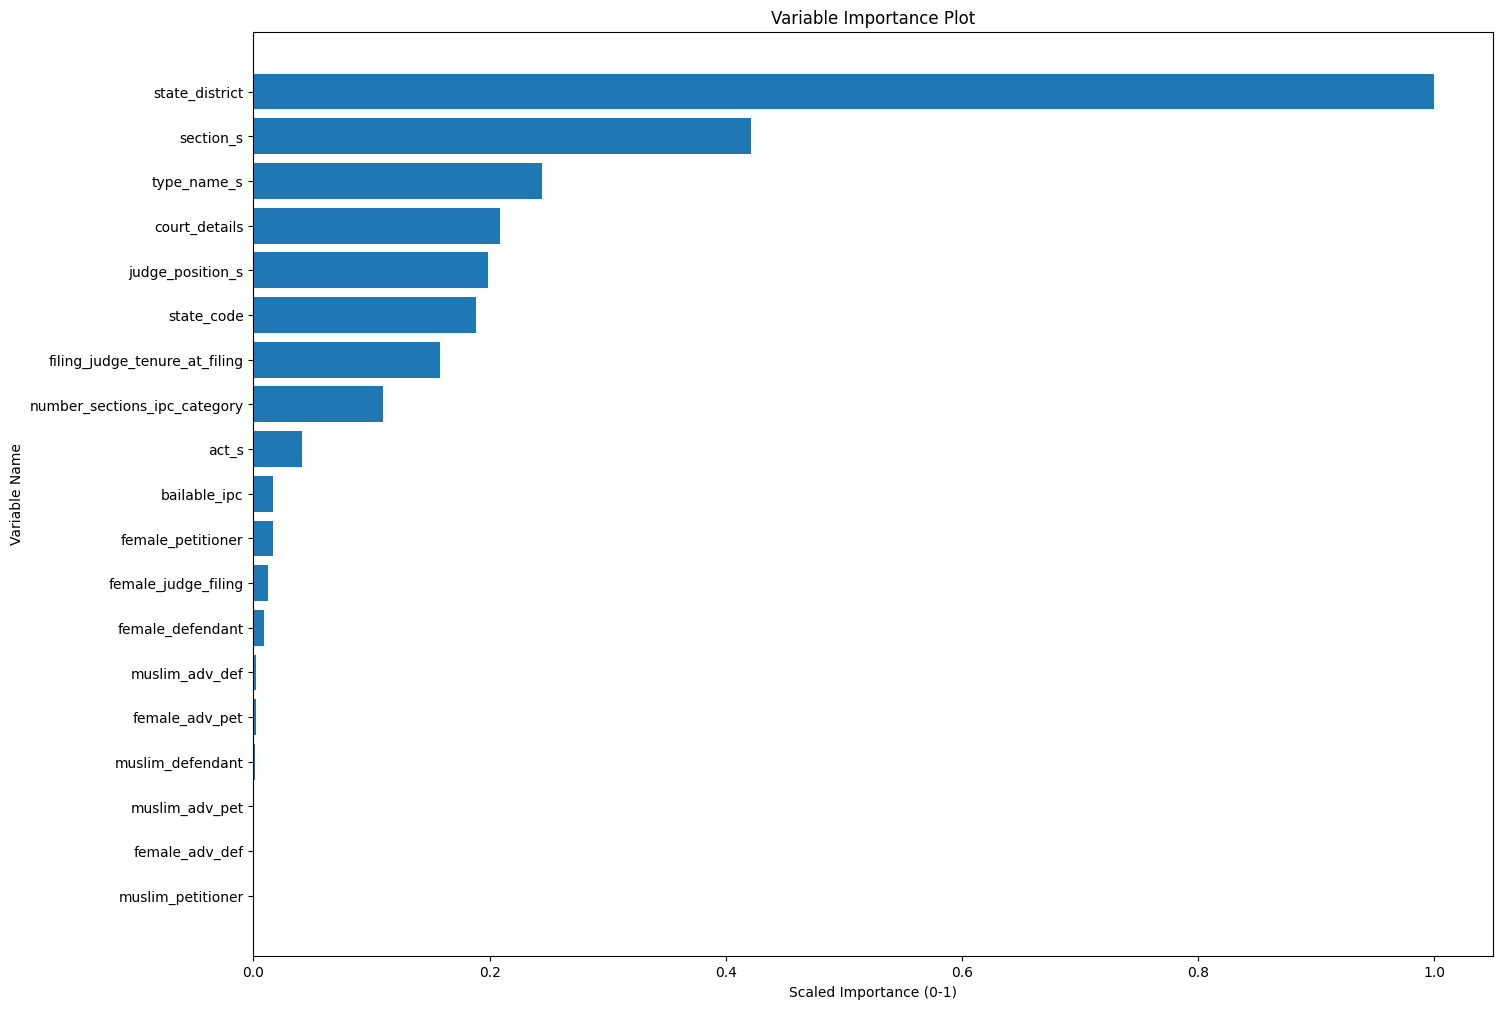

In [ ]:
# Get variable importance scores for all variables
varimp = best_model.varimp(use_pandas=True)
from sklearn.preprocessing import MinMaxScaler

# Sort the DataFrame by relative variable importance in descending order
varimp = varimp.sort_values(by='relative_importance', ascending=True)

# Min-Max scaling
scaler = MinMaxScaler()
varimp['scaled_importance'] = scaler.fit_transform(varimp[['relative_importance']])

# Create a bar plot for all variables and their importance scores
plt.figure(figsize=(16, 12))
plt.barh(varimp['variable'], varimp['scaled_importance'])
plt.xlabel('Scaled Importance (0-1)')
plt.ylabel('Variable Name')
plt.title('Variable Importance Plot')

# Save the plot to a file
plt.savefig('/content/drive/MyDrive/Law/criminalpartial-used/variable_importance_plot.png')

plt.show()


In [ ]:
plot_save_directory = "/content/drive/MyDrive/Law/criminalpartial-used/performance"
columns = ["number_sections_ipc_category", "female_defendant" ,"muslim_defendant", "filing_judge_tenure_at_filing" ,"female_adv_pet", "female_petitioner", "female_adv_def","bailable_ipc", "female_judge_filing", "muslim_petitioner","muslim_adv_def", "muslim_adv_pet", "act_s"]

for col in columns:
    # Increase the number of bins to a higher value, e.g., 512
    partial_plot = best_model.partial_plot(cases2010to2018_test, cols=[col], figsize=(5, 5), plot=False)

    # Extract the table data from the H2OTwoDimTable object
    data = partial_plot[0].cell_values
    text_file_path = os.path.join(plot_save_directory, f"{col}_partial_plot.txt")
    # Open a file for writing
    with open(text_file_path, "w") as text_file:

      text_file.write(partial_plot[0]._table_header + "\n")

      # Write the column headers
      text_file.write("\t".join(partial_plot[0]._col_header) + "\n")

      # Write the data
      for row in data:
          text_file.write("\t".join(map(str, row)) + "\n")

    # Save the plot to an image file based on the column name
    #plot_file_path = os.path.join(plot_save_directory, f"{col}_partial_plot.png")
    #plt.savefig(plot_file_path)

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%
PartialDependencePlot progress: |█████████████████

In [ ]:
partial_plot = best_model.partial_plot(cases2010to2018_test, cols=["judge_position_s"], nbins=188, figsize=(5, 5), plot=False)
# Extract the table data from the H2OTwoDimTable object
data = partial_plot[0].cell_values
text_file_path = os.path.join(plot_save_directory, f"judge_position_partial_plot.txt")
# Open a file for writing
with open(text_file_path, "w") as text_file:

  text_file.write(partial_plot[0]._table_header + "\n")

  # Write the column headers
  text_file.write("\t".join(partial_plot[0]._col_header) + "\n")

  # Write the data
  for row in data:
      text_file.write("\t".join(map(str, row)) + "\n")

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


In [ ]:
partial_plot = best_model.partial_plot(cases2010to2018_test, cols=["state_district"], nbins=616, figsize=(5, 5), plot=False)
# Extract the table data from the H2OTwoDimTable object
data = partial_plot[0].cell_values
text_file_path = os.path.join(plot_save_directory, f"state_district_partial_plot.txt")
# Open a file for writing
with open(text_file_path, "w") as text_file:

  text_file.write(partial_plot[0]._table_header + "\n")

  # Write the column headers
  text_file.write("\t".join(partial_plot[0]._col_header) + "\n")

  # Write the data
  for row in data:
      text_file.write("\t".join(map(str, row)) + "\n")

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


In [ ]:
partial_plot = best_model.partial_plot(cases2010to2018_test, cols=["section_s"], nbins=480, figsize=(5, 5), plot=False)
# Extract the table data from the H2OTwoDimTable object
data = partial_plot[0].cell_values
text_file_path = os.path.join(plot_save_directory, f"section_partial_plot.txt")
# Open a file for writing
with open(text_file_path, "w") as text_file:

  text_file.write(partial_plot[0]._table_header + "\n")

  # Write the column headers
  text_file.write("\t".join(partial_plot[0]._col_header) + "\n")

  # Write the data
  for row in data:
      text_file.write("\t".join(map(str, row)) + "\n")

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


In [ ]:
partial_plot = best_model.partial_plot(cases2010to2018_test, cols=["court_details"], nbins=4193, figsize=(5, 5), plot=False)
# Extract the table data from the H2OTwoDimTable object
data = partial_plot[0].cell_values
text_file_path = os.path.join(plot_save_directory, f"court_partial_plot.txt")
# Open a file for writing
with open(text_file_path, "w") as text_file:

  text_file.write(partial_plot[0]._table_header + "\n")

  # Write the column headers
  text_file.write("\t".join(partial_plot[0]._col_header) + "\n")

  # Write the data
  for row in data:
      text_file.write("\t".join(map(str, row)) + "\n")

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


In [ ]:
partial_plot = best_model.partial_plot(cases2010to2018_test, cols=["type_name_s"], nbins=913, figsize=(5, 5), plot=False)
# Extract the table data from the H2OTwoDimTable object
data = partial_plot[0].cell_values
text_file_path = os.path.join(plot_save_directory, f"type_name_partial_plot.txt")
# Open a file for writing
with open(text_file_path, "w") as text_file:

  text_file.write(partial_plot[0]._table_header + "\n")

  # Write the column headers
  text_file.write("\t".join(partial_plot[0]._col_header) + "\n")

  # Write the data
  for row in data:
      text_file.write("\t".join(map(str, row)) + "\n")

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


In [ ]:
partial_plot = best_model.partial_plot(cases2010to2018_test, cols=["state_code"], nbins=32, figsize=(5, 5), plot=False)
# Extract the table data from the H2OTwoDimTable object
data = partial_plot[0].cell_values
text_file_path = os.path.join(plot_save_directory, f"state_code_partial_plot.txt")
# Open a file for writing
with open(text_file_path, "w") as text_file:

  text_file.write(partial_plot[0]._table_header + "\n")

  # Write the column headers
  text_file.write("\t".join(partial_plot[0]._col_header) + "\n")

  # Write the data
  for row in data:
      text_file.write("\t".join(map(str, row)) + "\n")

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


In [ ]:
import random
explanations_dir = "/content/drive/MyDrive/Law/criminalpartial-used/explaination_plots"
os.makedirs(explanations_dir, exist_ok=True)

num_rows_to_explain = 10
random_indices = random.sample(range(cases2010to2018_test.nrow), num_rows_to_explain)

def save_plots_row(plot_data,plots_dir, parent_key=""):
    for key, value in plot_data.items():
        if isinstance(value, h2o.plot._plot_result._MObject):
            # This is a plot object, save it
            plot_figure = value.figure()
            plot_filename = f"{plots_dir}/{parent_key}_{key}.png"
            plot_figure.savefig(plot_filename)
        elif isinstance(value, dict):
            # Recursively explore nested dictionaries
            save_plots(value, parent_key=f"{parent_key}_{key}")

# Explain each of the selected rows and save the explanations
for row_index in random_indices:
    print(row_index)
    explanation = best_model.explain_row(cases2010to2018_test, row_index)

    # Call the function to save plots
    save_plots_row(explanation,explanations_dir, row_index)


Output hidden; open in https://colab.research.google.com to view.

https://colab.research.google.com/github/hnishi/hello-automl/blob/main/h2o_titanic.ipynb#scrollTo=29Bja5MVOB7F

https://colab.research.google.com/github/srivatsan88/YouTubeLI/blob/master/H2O_AutoML.ipynb#scrollTo=fBEls6JqeH0p

https://github.com/hyunjoonbok/Python-Projects/blob/master/H2O/Complete%20guide%20to%20Machine%20Learning%20with%20H2O%20(AutoML).ipynb

https://github.com/h2oai/h2o-tutorials/blob/master/best-practices/automl/automl_best_practices.ipynb